In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path=os.path.join(".","googleplaystore.csv")
path

'.\\googleplaystore.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df.isna().sum() # Check total number of NaN rows

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df=df.dropna() # Drop all Na columns, App store data is not very easy to infer values for null values
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
df.duplicated().sum() # Find duplicated rows


474

In [8]:
# Paid apps price has $ symbol thus being parsed as object type. Remove the $ to allow parsing the currency number as float
df['Price']=df['Price'].replace('[\$,)]','',regex=True)

C:\Users\mcsle\AppData\Local\Temp/ipykernel_29140/3467839438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].replace('[\$,)]','',regex=True)


In [10]:
# Now we can cast float type to numeric columns, but why Reviews are getting casted now?
# drop duplicates may not differentiate different object values (in reviews column for example), causing duplicate rows even after drop duplicates
# Solution: casting numeric columns to its intended type including reviews
df=df.astype({'Reviews':'float','Price':'float'})
df=df.drop_duplicates(subset=['App'],keep="first") 

In [11]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
df=df.drop(columns=['Genres','Current Ver','Android Ver','Size']) # Drop irrelevant columns for the analysis
# Some contains "varies" value that makes aggeration impossible
# Genres is too similar to category, also is nested

df

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0.0,Everyone,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0.0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0.0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,0.0,Everyone,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,500+,Free,0.0,Everyone,"June 18, 2017"
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,"5,000+",Free,0.0,Everyone,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100+,Free,0.0,Everyone,"July 6, 2018"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,"1,000+",Free,0.0,Mature 17+,"January 19, 2015"


In [13]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0.0,Everyone,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0.0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0.0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,0.0,Everyone,"June 20, 2018"


In [14]:
df.tail(3)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100+,Free,0.0,Everyone,"July 6, 2018"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,"1,000+",Free,0.0,Mature 17+,"January 19, 2015"
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,"10,000,000+",Free,0.0,Everyone,"July 25, 2018"


In [15]:
print(f"Number of rows: {df.shape[0]}, number of columns: {df.shape[1]}") # notice the non continous index

Number of rows: 8190, number of columns: 9


In [16]:
df=df.reset_index()# reset index count to keep index consistent
df

,index,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0.0,Everyone,"January 7, 2018"
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0.0,Everyone,"January 15, 2018"
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0.0,Everyone,"August 1, 2018"
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018"
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,0.0,Everyone,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...
8185,10834,FR Calculator,FAMILY,4.0,7.0,500+,Free,0.0,Everyone,"June 18, 2017"
8186,10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,"5,000+",Free,0.0,Everyone,"July 25, 2017"
8187,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100+,Free,0.0,Everyone,"July 6, 2018"
8188,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,"1,000+",Free,0.0,Mature 17+,"January 19, 2015"


In [17]:
df=df.drop(columns=['index'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   float64
 4   Installs        8190 non-null   object 
 5   Type            8190 non-null   object 
 6   Price           8190 non-null   float64
 7   Content Rating  8190 non-null   object 
 8   Last Updated    8190 non-null   object 
dtypes: float64(3), object(6)
memory usage: 576.0+ KB


In [18]:
df.describe(include='all')

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
count,8190,8190,8190.000000,8.190000e+03,8190,8190,8190.000000,8190,8190
unique,8190,33,NaN,NaN,19,2,NaN,6,1299
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,NaN,NaN,"1,000,000+",Free,NaN,Everyone,"August 3, 2018"
freq,1,1607,NaN,NaN,1414,7588,NaN,6612,245
mean,NaN,NaN,4.173321,2.554354e+05,NaN,NaN,1.038342,NaN,NaN
std,NaN,NaN,0.536691,1.986309e+06,NaN,NaN,16.864040,NaN,NaN
min,NaN,NaN,1.000000,1.000000e+00,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,4.000000,1.260000e+02,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,4.300000,3.009500e+03,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,4.500000,4.391425e+04,NaN,NaN,0.000000,NaN,NaN


In [19]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Last Updated'],
      dtype='object')

In [20]:
df.head(3)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0.0,Everyone,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0.0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0.0,Everyone,"August 1, 2018"


In [21]:
df_astrology=df.loc[df['App'].str.contains("Astrology",case=True)] # Case sensitive
df_astrology

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
1200,Horoscopes – Daily Zodiac Horoscope and Astrology,LIFESTYLE,4.6,161143.0,"10,000,000+",Free,0.0,Everyone 10+,"June 25, 2018"
1222,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225.0,"100,000+",Free,0.0,Everyone,"July 26, 2018"
8189,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,"10,000,000+",Free,0.0,Everyone,"July 25, 2018"


In [22]:
df_astrology=df.loc[df['App'].str.contains("Astrology",case=False)] # Case insensitive
df_astrology

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
1200,Horoscopes – Daily Zodiac Horoscope and Astrology,LIFESTYLE,4.6,161143.0,"10,000,000+",Free,0.0,Everyone 10+,"June 25, 2018"
1222,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225.0,"100,000+",Free,0.0,Everyone,"July 26, 2018"
8189,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,"10,000,000+",Free,0.0,Everyone,"July 25, 2018"


In [23]:
len(df_astrology)

3

In [24]:
# The word Astrology was used 3 times

In [25]:
df['Rating'].mean()

4.173321123321126

In [26]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [47]:
df_bycat=df.groupby('Category').mean().sort_values(by='Rating',ascending=False)
df_bycat

,Rating,Reviews,Price
Category,,,
EVENTS,4.435556,3.568667e+03,0.000000
ART_AND_DESIGN,4.376667,2.365133e+04,0.099500
EDUCATION,4.364407,1.132489e+05,0.152203
BOOKS_AND_REFERENCE,4.344970,9.894027e+04,0.141302
PERSONALIZATION,4.331419,1.808863e+05,0.414831
PARENTING,4.300000,1.907218e+04,0.191600
BEAUTY,4.278571,9.407929e+03,0.000000
GAME,4.247368,6.823420e+05,0.304134
SOCIAL,4.247291,1.122795e+06,0.009754


In [28]:
len(df[df['Rating']==5.0])

271

In [29]:
# Get average reviews. Column is obj type thus giving inf if caculate mean, thus conversion to float is needed to get number value
df['Reviews'].mean()

255435.43907203907

In [30]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [31]:
# No of free apps
len(df[df['Type']=='Free'])

7588

In [32]:
len(df[df['Type']=='Paid'])

602

In [33]:
df_type_reviews = df.groupby('Type').sum().reset_index()
labels = 'Free','Paid'
df_type_reviews

,Type,Rating,Reviews,Price
0,Free,31615.1,2.085421e+09,0.00
1,Paid,2564.4,6.594959e+06,8504.02


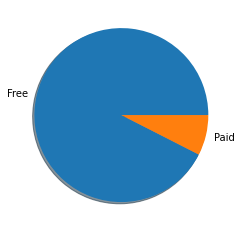

In [34]:
plt.pie(data=df_type_reviews,x='Rating',labels=labels,shadow=True,)
plt.show()

In [35]:

df[df['Reviews']==df['Reviews'].max()]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
1870,Facebook,SOCIAL,4.1,78158306.0,"1,000,000,000+",Free,0.0,Teen,"August 3, 2018"


In [36]:
df.sort_values(by='Reviews',ascending=False).head(5)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
1870,Facebook,SOCIAL,4.1,78158306.0,"1,000,000,000+",Free,0.0,Teen,"August 3, 2018"
287,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,"1,000,000,000+",Free,0.0,Everyone,"August 3, 2018"
1871,Instagram,SOCIAL,4.5,66577313.0,"1,000,000,000+",Free,0.0,Teen,"July 31, 2018"
286,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,"1,000,000,000+",Free,0.0,Everyone,"August 1, 2018"
1290,Clash of Clans,GAME,4.6,44891723.0,"100,000,000+",Free,0.0,Everyone 10+,"July 15, 2018"


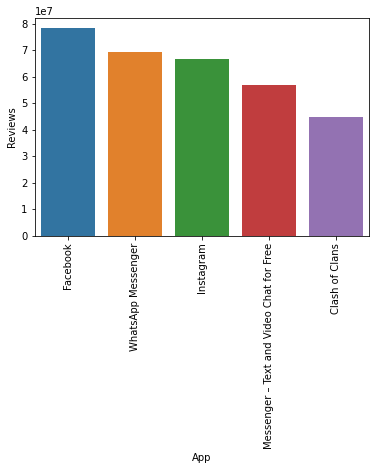

In [37]:
sns.barplot(data=df.sort_values(by='Reviews',ascending=False).head(5),y='Reviews',x='App')
plt.xticks(rotation=90)
plt.show()

In [38]:
df.groupby('Type')['Rating'].mean()

Type
Free    4.166460
Paid    4.259801
Name: Rating, dtype: float64

In [39]:
# Top installed apps (there are more than 5 apps)
# Installs are repesented as "over certain number" instead of actual install numbers. Max over range is 1,000,000,000 and there are 58 apps.
df.loc[df['Installs']=='1,000,000,000+']

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
144,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,"1,000,000,000+",Free,0.0,Teen,"August 3, 2018"
286,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,"1,000,000,000+",Free,0.0,Everyone,"August 1, 2018"
287,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,"1,000,000,000+",Free,0.0,Everyone,"August 3, 2018"
289,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,"1,000,000,000+",Free,0.0,Everyone,"August 1, 2018"
291,Gmail,COMMUNICATION,4.3,4604324.0,"1,000,000,000+",Free,0.0,Everyone,"August 2, 2018"
292,Hangouts,COMMUNICATION,4.0,3419249.0,"1,000,000,000+",Free,0.0,Everyone,"July 21, 2018"
336,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,"1,000,000,000+",Free,0.0,Everyone,"August 3, 2018"
650,Google Play Games,ENTERTAINMENT,4.3,7165362.0,"1,000,000,000+",Free,0.0,Teen,"July 16, 2018"
1274,Subway Surfers,GAME,4.5,27722264.0,"1,000,000,000+",Free,0.0,Everyone 10+,"July 12, 2018"
1870,Facebook,SOCIAL,4.1,78158306.0,"1,000,000,000+",Free,0.0,Teen,"August 3, 2018"


In [40]:
#Bonus

In [41]:
df_age_group=df.groupby('Content Rating')[['App']].count() # No of apps by content rating
df_age_group

,App
Content Rating,
Adults only 18+,3
Everyone,6612
Everyone 10+,305
Mature 17+,357
Teen,912
Unrated,1


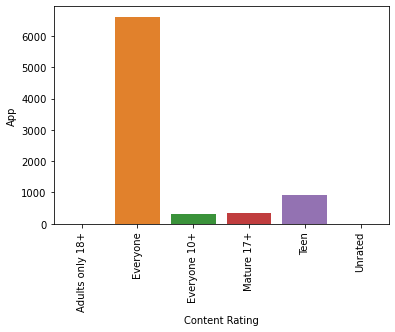

In [42]:
sns.barplot(data=df_age_group.reset_index(),y='App',x='Content Rating')
plt.xticks(rotation=90)
plt.show()

In [43]:
df_age_group=df.groupby('Content Rating').mean() #avg review for app per category
df_age_group

,Rating,Reviews,Price
Content Rating,,,
Adults only 18+,4.300000,27116.000000,0.000000
Everyone,4.166410,196654.251210,1.155676
Everyone 10+,4.225902,660091.298361,0.458033
Mature 17+,4.121849,243802.400560,0.272129
Teen,4.225658,551853.618421,0.686228
Unrated,4.100000,1186.000000,0.000000


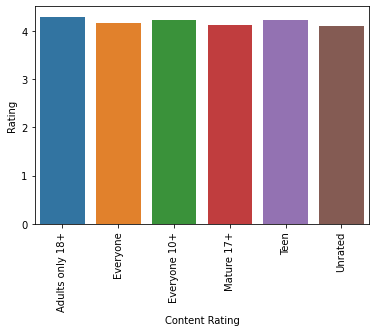

In [44]:
sns.barplot(data=df_age_group.reset_index(),y='Rating',x='Content Rating')
plt.xticks(rotation=90)
plt.show()

In [45]:
df[df['Type']=='Paid'].sort_values(by='Reviews',ascending=False).head(1) # most reviewed paid app

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
1661,Minecraft,FAMILY,4.5,2376564.0,"10,000,000+",Paid,6.99,Everyone 10+,"July 24, 2018"


In [46]:
# find the 3 app that was last updated the earliest
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df.sort_values(by='Last Updated',ascending=True).head(3)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
5643,FML F*ck my life + widget,FAMILY,4.2,1415.0,"100,000+",Free,0.0,Everyone,2010-05-21
5605,CJ Poker Odds Calculator,GAME,4.1,207.0,"50,000+",Free,0.0,Everyone,2011-01-30
7813,FD Shift Calendar Widget,TOOLS,4.1,981.0,"100,000+",Free,0.0,Everyone,2011-03-16


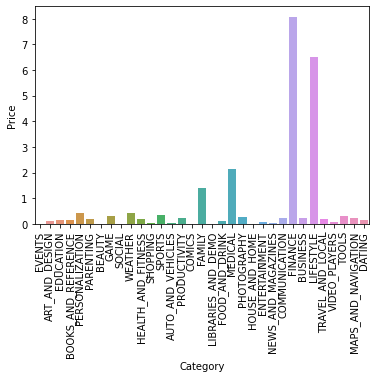

In [48]:
sns.barplot(data=df_bycat.reset_index(),y='Price',x='Category')# avg price in each app category (free apps included)
plt.xticks(rotation=90)
plt.show()